# Project Part 1:

## Importing/Installing libraries

In [1]:
# Getting the post reader
from post_parser_record import PostParserRecord
post_reader = PostParserRecord("SPosts.xml")

In [2]:
# Getting the tokenizer
!pip install nltk 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords  

stop_words = set(stopwords.words('english'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Getting the tokenizer
!pip install nltk 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords  

stop_words = set(stopwords.words('english'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Getting wordcloud
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Analyzing the Collection

In [5]:
import string
import re

# Cleans the text

def clean_string(s):
  # Removes HTML tags
  CLEANR = re.compile('<.*?>') 
  s = re.sub(CLEANR, '', s)
  # Removes newlines and adds a space so that words do not combine
  s = s.replace('\n', ' ') 
  # Removes punctuation
  s = s.translate(str.maketrans('','',string.punctuation))
  s = s.replace("’","")
  s = s.replace("“","")
  s = s.replace("”","")
  return s

### Iteration through questions and answers for analysis

In [6]:
word_dict = dict()
token_dict = dict()
tags = dict()
qword_amt = []
qsentence_amt = []
aword_amt = []
asentence_amt = []
num_of_answers = 0
acc_answers = 0
no_answer = 0
no_answer_ex = []
dup_q = 0
dup_list = []
dup1 = []
dup2 = []
comment_questions = []
user_ask_count = {}
question_to_answer = {}
ans_list = []

# Gathering Question Data
for question_id in post_reader.map_questions:
 
  # Gets question
  question = post_reader.map_questions[question_id]

  # 2. Gets tag
  tag = question.tags
  tag_count = 1

  # 2. Loop through tags, counting each
  for t in tag:
    if t in tags:
      tag_count = tags[t] + 1
      tags.update({t: tag_count})
    else:
      tags.update({t: 1})

  # 4. 
  # Questions with no answer
  if question.answer_count == 0:
    no_answer += 1
    if no_answer < 6:
      no_answer_ex.append(question_id)
  # Accepted Answer
  if question.accepted_answer_id != None:
    acc_answers += 1

  # 8.
  # Checks string of question for a substring which indicates that it is a duplicate
  if question.body.find('<strong>Possible Duplicate:</strong>') != -1:
    dup_q += 1
    if dup_q < 6:
      dup_list.append(question_id)

  # 9.
  if question.comment_count != 0:
    if len(comment_questions) < 5:
      comment_questions.append(question_id)

  # 10.
  # Creates a dictionary of which users have asked the most questions
  user = question.owner_user_id
  if user in user_ask_count:
    q_count = user_ask_count[user] + 1
    user_ask_count.update({user : q_count})
  else:
    user_ask_count.update({user : 1})


  # Number of answers in each question
  answers = question.answer_count
  num_of_answers += answers

  # Combines question body and title for words
  question_b = clean_string(question.body.lower().strip()).split()
  question_t = clean_string(question.title.lower().strip()).split()
  question_bt = question_b + question_t

  # 3. Add amount of words in question
  qword_amt.append(len(question_bt))

  # 3. Add amount of sentences in question
  # Removes HTML tags
  CLEANR = re.compile('<.*?>')
  qb = re.sub(CLEANR, '', question.body.lower())
  qt = re.sub(CLEANR, '', question.title.lower())

  body_sentences = re.split('\. |! |\? ', qb)
  title_sentences = re.split('\. |! |\? ', qt)

  body_sentences.extend(title_sentences)
  qsentence_amt.append(len(body_sentences))

  # Combines question body and title for tokens
  question_b1 = question.body.lower().strip()
  question_t1 = question.title.lower().strip()
  question_bt2 = question_b1 + " " + question_t1
  question_bt2 = clean_string(question_bt2)

  for word in question_bt: # Loop through words
    count = 1
    if word in word_dict:
      count = word_dict[word] + 1
      word_dict.update({word: count})
    else:
      word_dict.update({word: count})

  # Tokenizing
  token_words = nltk.word_tokenize(question_bt2)
  token_words = [w for w in token_words if not w.lower() in stop_words]

  # Added part for 8. that gets normalized text for ID 1 and 386
  if question_id == 1731:
    dup1 = token_words[:]
  if question_id == 2768:
    dup2 = token_words[:]

  for token in token_words:   # Loop through tokens
    count = 1
    if token in token_dict:
      count = token_dict[token] + 1
      token_dict.update({token: count})
    else:
      token_dict.update({token: count})

# Sorting tags
sorted_tags = {k: v for k, v in sorted(tags.items(), key=lambda item: item[1], reverse = True)}

# Sorting user question counts
sorted_user_questions = {k: v for k, v in sorted(user_ask_count.items(), key=lambda item: item[1], reverse = True)}

# Gathering Answer Data
for answer_id in post_reader.map_just_answers:
  
  # Gets answer and text for words
  answer = post_reader.map_just_answers[answer_id]
  answer_text = clean_string(answer.body.lower().strip()).split()

  # 3. Add amount of words in answer
  aword_amt.append(len(answer_text))

  # 3. Add amount of sentences in question
  # Removes HTML tags
  CLEANR = re.compile('<.*?>')
  at = re.sub(CLEANR, '', answer.body.lower())

  answer_sentences = []
  answer_sentences = re.split('\. |! |\? ', at)

  asentence_amt.append(len(answer_sentences))

  # Gets answer text for tokens
  answer_text1 = answer.body.lower().strip()
  answer_text1 = clean_string(answer_text1)

  # 6. 
  ans_list = []
  ans = answer.parent_id
  if ans in question_to_answer:
    ans_list = question_to_answer[ans]
    ans_list.append(answer_id)
    question_to_answer.update({ans : ans_list}) 
  else:
    ans_list.append(answer_id)
    question_to_answer.update({ans : ans_list}) 

  # Loop through words
  for word in answer_text: 
    count = 1
    if word in word_dict:
      count = word_dict[word] + 1
      word_dict.update({word: count})
    else:
      word_dict.update({word: count})

  # Tokenizing
  token_words2 = nltk.word_tokenize(answer_text1)
  token_words2 = [w for w in token_words2 if not w.lower() in stop_words]

  for token in token_words2:   # Loop through tokens
    count = 1
    if token in token_dict:
      count = token_dict[token] + 1
      token_dict.update({token: count})
    else:
      token_dict.update({token: count})

In [7]:
# Sorting
sorted_words = list({k: v for k, v in sorted(word_dict.items(), key=lambda item: item[1], reverse = True)})
sorted_tokens = list({k: v for k, v in sorted(token_dict.items(), key=lambda item: item[1], reverse = True)})

i=0
top20words = []
while i < 20:
  top20words.append(sorted_words[i])
  i+=1

print(top20words)

j=0
top20tokens = []
while j < 20:
  top20tokens.append(sorted_tokens[j])
  j+=1

print(top20tokens)

['the', 'of', 'to', 'a', 'and', 'in', 'that', 'is', 'it', 'was', 'he', 'i', 'as', 'for', 'this', 'with', 'his', 'on', 'be', 'but']
['would', 'one', 'time', 'like', 'could', 'also', 'first', 'know', 'even', 'story', 'think', 'book', 'harry', 'see', 'dont', 'people', 'back', 'two', 'world', 'said']


### Step 3: 1.

(-0.5, 399.5, 199.5, -0.5)

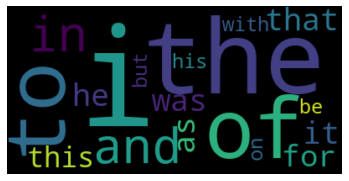

In [8]:
words_string = ' '.join(top20words)

wordcloud = WordCloud(max_words=20, stopwords = "asfgsdfg").generate(words_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

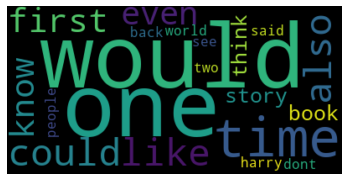

In [9]:
tokens_string = ' '.join(top20tokens)
wordcloud2 = WordCloud(max_words=20, stopwords = "sfgsdfgsdfgds").generate(tokens_string)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

Compare differences: It seems that most of the words that appear most frequently are stopwords in the first word cloud which is not tokenized using nltk tokenizer. 

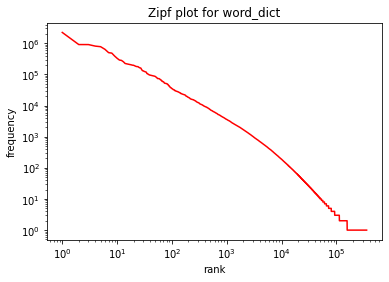

In [10]:
rf = [(r+1, f) for r, f in enumerate(sorted(word_dict.values(), reverse = True))]
rs, fs = zip(*rf)

plt.clf()
plt.xscale('log')
plt.yscale('log')
plt.title('Zipf plot for word_dict')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.plot(rs, fs, 'r-')
plt.show()

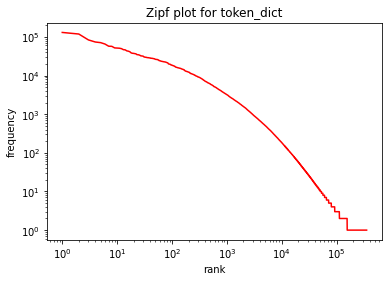

In [11]:
rf = [(r+1, f) for r, f in enumerate(sorted(token_dict.values(), reverse = True))]
rs, fs = zip(*rf)

plt.clf()
plt.xscale('log')
plt.yscale('log')
plt.title('Zipf plot for token_dict')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.plot(rs, fs, 'r-')
plt.show()

It appears that both of these graphs follow Zipf's law as they are both straight lines more-or-less which shows Zipf distribution. (The line is straight like this because the axis are logarithmic)

### Step 3: 2.

In [12]:
print('Top-10 common question tags used for the questions: \n')
for x in range(10):
  print(list(sorted_tags.keys())[x])

Top-10 common question tags used for the questions: 

story-identification
harry-potter
star-wars
star-trek
marvel
short-stories
tolkiens-legendarium
movie
books
dc


{'story-identification': 20110, 'harry-potter': 6917, 'star-wars': 6417, 'star-trek': 5301, 'marvel': 4453, 'short-stories': 4053, 'tolkiens-legendarium': 3032, 'movie': 2606, 'books': 2550, 'dc': 2463, 'marvel-cinematic-universe': 2372, 'novel': 2209, 'the-lord-of-the-rings': 2040, 'star-trek-tng': 1566, 'game-of-thrones': 1561, 'doctor-who': 1547, 'comics': 1409, 'aliens': 1388, 'a-song-of-ice-and-fire': 1217, 'time-travel': 1183}


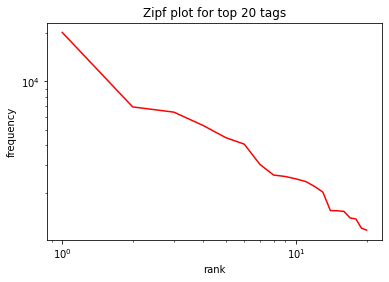

In [13]:
top20tags = {}
for x in range(20):
  top20tags.update({list(sorted_tags.keys())[x] : sorted_tags[list(sorted_tags.keys())[x]]})

print(top20tags)

rf = [(r+1, f) for r, f in enumerate(top20tags.values())]
rs, fs = zip(*rf)

plt.clf()
plt.xscale('log')
plt.yscale('log')
plt.title('Zipf plot for top 20 tags')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.plot(rs, fs, 'r-')
plt.show()

### Step 3: 3.

In [14]:
qtotal_words = 0 
for wl in qword_amt:
    qtotal_words += wl

print('Average words in questions: ' + str(qtotal_words/len(post_reader.map_questions)))

qtotal_sentences = 0
for sl in qsentence_amt:
    qtotal_sentences += sl

print('Average sentences in questions: ' + str(qtotal_sentences/len(post_reader.map_questions)))

atotal_words = 0 
for wl in aword_amt:
    atotal_words += wl

print('Average words in answers: ' + str(atotal_words/len(post_reader.map_just_answers)))

atotal_sentences = 0
for sl in asentence_amt:
    atotal_sentences += sl

print('Average sentences in answers: ' + str(atotal_sentences/len(post_reader.map_just_answers)))

Average words in questions: 132.20946390696994
Average sentences in questions: 5.898369048489724
Average words in answers: 204.10968573234575
Average sentences in answers: 7.551329843271366


### Step 3: 4.

In [15]:
print('Average number of answers given to each question: ' + str(num_of_answers/len(post_reader.map_questions)))
print('Questions with no answer: ' + str(no_answer))
print('Questions with an accepted answer: ' + str(acc_answers))

Average number of answers given to each question: 1.8049879324215607
Questions with no answer: 7320
Questions with an accepted answer: 39125


### Step 3: 5.

In [16]:
no_answer_ex

[1823, 3653, 4430, 5610, 6685]

Looking at these 5 posts manually I think I have a decent understanding on what can contribute to questions not recieving an answer. Questions can be flagged/labeled as possible duplicates, so because there is no need to answer the same question again so they are routed to the original question and the post is closed before someone can answer. Some questions that are quite short in length and a bit bland in topic can be two things that I think could contribute to the lack of an answer. Some questions are also very obscure or are extremely difficult to answer which can make people hesitate or choose not to respond, resulting in 0 answers

### Step 3: 6.

In [17]:
first_accepted_answers = 0
# Loops through each key in the dictionary and if the first answer that is posted is (the first value)
# is the accepted answer, increments the count by 1
for ans in question_to_answer:
  if question_to_answer[ans][0] == post_reader.map_questions[ans].accepted_answer_id:
    first_accepted_answers += 1

print('Number of accepted answers that are the first answers that are posted: ' + str(first_accepted_answers))

Number of accepted answers that are the first answers that are posted: 30019


For the most part, people whos' answers are accepted have a high reputation score as is indicated by their score, especially in comparison to other answers that were not the accepted answer.

Accepted answers are typically the ones with the highest score the majority of the time, however, this is not always the case. An example of an accepted answer having a lower score than another answer lies in the answers to question ID 1298. The accepted answer has a score of 28, yet another answer has a higher score of 38.

### Step 3: 7.

There does seem to be a correlation between the readability of the question and the chance of receiving an answer as questions that are hard to read are less likely to recieve an answer than one that is not hard to read.

### Step 3: 8.

In [18]:
print('Questions with a duplicate question: ' + str(dup_q))
print('Some question post IDs with duplicates: ' + str(dup_list))

Questions with a duplicate question: 123
Some question post IDs with duplicates: [2768, 3653, 5610, 5697, 6980]


In [19]:
print('Post ID 1731: ' + str(dup1))
print('Post ID 2768: ' + str(dup2))

common_terms = [v for v in dup1 if v in dup2]
print('\nNumber of common terms between the two: ' + str(len(common_terms)))

Post ID 1731: ['star', 'trek', 'next', 'generation', 'onward', 'warp', 'speed', 'basically', 'cubic', 'scale', 'warps', '1', '9', 'close', 'warp', '10', 'suddenly', 'develops', 'puzzling', 'scale', 'seen', 'table', 'scale', 'warp', '10', 'considered', 'infinite', 'occupying', 'points', 'universe', 'simultaneously', 'therefore', 'effectively', 'teleporting', 'instantaneously', 'question', 'confusing', 'scale', 'uniform', 'cubic', 'scale', 'ever', 'official', 'explanation', 'clarification', 'im', 'looking', 'writers', 'decided', 'inuniverse', 'explanation', 'star', 'trek', 'writers', 'decide', 'warp', '10', 'would', 'infinite']
Post ID 2768: ['possible', 'duplicate', 'star', 'trek', 'writers', 'decide', 'warp', '10', 'would', 'infinite', 'tos', 'forget', 'episode', 'help', 'enterprise', 'reaches', 'warp', '13', 'something', 'significantly', 'greater', '10', 'yet', 'tng', 'warp', 'scale', 'supposed', 'top', '10', 'infinite', 'something', 'like', 'several', 'times', 'see', 'enterprised', '

### Step 3: 9.

In [20]:
comment_questions

[1, 2, 3, 6, 8]

In the comments, people are typically getting further knowledge of what the asker is truly looking for the answer to, helping clear up confusion caused by the question, or contributing something that is not an answer to the question (could be a funny joke or a discussion about the question or aspects of the question). In many cases, one comment clarifies the original question, another comment clarifies the first comment, and another comment is simply commenting on the topic of the question. 

### Step 3: 10.

The extra analysis I decided to investigate was which user ID has asked the most questions and how many questions they asked.

In [21]:
print(sorted_user_questions)

{None: 1956, 931: 951, 976: 705, 3804: 615, 4356: 400, 51379: 396, 23243: 374, 3823: 357, 1693: 351, 44906: 323, 22917: 321, 3500: 295, 44025: 289, 31394: 288, 63201: 275, 13217: 269, 51226: 257, 5184: 243, 48874: 236, 65457: 219, 20557: 217, 1148: 216, 47051: 211, 114389: 200, 40294: 196, 45: 193, 89771: 183, 1234: 181, 20007: 176, 19561: 174, 64888: 160, 86251: 160, 54827: 158, 68065: 158, 92306: 157, 20393: 154, 1109: 151, 56162: 148, 20774: 147, 58193: 147, 40599: 146, 55866: 145, 53038: 132, 45944: 124, 13090: 120, 79438: 120, 105042: 120, 70477: 117, 40833: 116, 143: 115, 4918: 113, 7885: 111, 70135: 110, 57310: 109, 21267: 106, 5912: 105, 29220: 104, 43538: 101, 50522: 100, 120088: 100, 161: 98, 69621: 98, 98: 96, 4056: 96, 20916: 94, 2565: 91, 1359: 90, 15632: 90, 11159: 89, 112139: 89, 54606: 88, 51142: 87, 13716: 86, 54605: 85, 33591: 82, 75310: 82, 101624: 82, 6239: 81, 20221: 81, 1338: 79, 16835: 79, 51174: 79, 19475: 78, 75000: 78, 115696: 78, 115706: 78, 1150: 77, 17551: 

## Step 4: Building Inverted Index and defining functions to be used for searching

In [22]:
# Creates the Inverted Index

inverted_index = {}

# Gathering Question Data
for question_id in post_reader.map_questions:
  
  doc_freq = {}

  # Gets question
  question = post_reader.map_questions[question_id]

  # Combines question body and title
  question_b = question.body.lower().strip()
  question_t = question.title.lower().strip()
  question_bt = question_b + " " + question_t

  # Cleaning
  question_bt = clean_string(question_bt)

  # Tokenizing
  token_words = nltk.word_tokenize(question_bt)
  token_words = [w for w in token_words if not w.lower() in stop_words]

  for token in token_words:   # Loop through tokens
    if token in inverted_index:     # Token is already in index
      doc_freq = inverted_index[token]  # Sets doc_freq to the current postings/counts for the token
      if question_id in doc_freq:
        freq = doc_freq[question_id] + 1
        doc_freq.update({question_id: freq})
        inverted_index.update({token: doc_freq})
      else:
        doc_freq.update({question_id: 1})
    else:   # Token is not in index, adds to index with a frequency of 1
      doc_freq = {question_id: 1}     
      inverted_index.update({token: doc_freq})

  
# Gathering Answer Data
for answer_id in post_reader.map_just_answers:
 
  doc_freq = {}

  # Gets answer and text
  answer = post_reader.map_just_answers[answer_id]
  answer_text = answer.body.lower().strip()

  # Cleaning
  answer_text = clean_string(answer_text)

  # Tokenizing
  token_words2 = nltk.word_tokenize(answer_text)
  token_words2 = [w for w in token_words2 if not w.lower() in stop_words]

  for token in token_words2:   # Loop through tokens
    if token in inverted_index:     # Token is already in index
      doc_freq = inverted_index[token]  
      if answer_id in doc_freq:
        freq = doc_freq[answer_id] + 1
        doc_freq.update({answer_id: freq})
        inverted_index.update({token: doc_freq})
      else:
        doc_freq.update({answer_id: 1})
    else:   # Token is not in index, adds to index with a frequency of 1
      doc_freq = {answer_id: 1}     
      inverted_index.update({token: doc_freq})



# Sorting keys 
sorted_keys = sorted(inverted_index.keys())
inverted_index = {key:inverted_index[key] for key in sorted_keys}

# Sorting values
for word in inverted_index:
  inverted_index[word] = dict(sorted(inverted_index[word].items(), key=lambda item: item[1], reverse=True))

In [23]:
print(len(inverted_index))

351743


In [24]:
# Method to print the first k search results by rank. For this project I set k to 50
def top_k(results, k):

  if len(results)==0:
    print("No results")
    return
  top_k = results[:k]
  rank = 1
  print("Rank\tPost ID")
  for item in top_k:
    print(str(rank) + "\t" + str(item))
    rank+=1

In [25]:
# Used to look at body and determine relevance
def top_k2(results, k):
  top_k = results[:k]
  for item in top_k:
    print("START OF NEXT TEXT: " + str(item))
    if item in post_reader.map_questions:
      print(post_reader.map_questions[item].body)
    else:
      print(post_reader.map_just_answers[item].body)

Boolean Search

In [26]:
# For the and, will get the intersection of the two lists
def intersect(list1, list2):
  list1 = sorted(list(list1))
  list2 = sorted(list(list2))
  matches = []
  i = 0
  j = 0
  while i < len(list1) and j < len(list2):
      if list1[i] < list2[j]:
          i += 1
      elif list2[j] < list1[i]:
          j+= 1
      else: # Only adds to matches if the index's match
          matches.append(list2[j])
          j += 1
          i += 1
  
  return sorted(matches)

In [27]:
# For the or, will get the union of the two lists
def union(list1, list2):
  list1 = sorted(list(list1))
  list2 = sorted(list(list2))
  matches = []
  i = 0
  j = 0
  while i < len(list1) and j < len(list2):
      if list1[i] < list2[j]:
          matches.append(list1[i])
          i += 1
      elif list2[j] < list1[i]:
          matches.append(list2[j])
          j += 1
      else:
          matches.append(list2[j])
          i += 1
          j += 1
  
  # Add rest of list1 to matches
  while i < len(list1):
      matches.append(list1[i])
      i += 1
  
  # Add rest of list2 to matches
  while j < len(list2):
      matches.append(list2[j])
      j += 1
  
  return sorted(matches)

In [28]:
# Function for a boolean search with (and) or (or)
def boolean_search_or (query):
  # Cleaning query
  query = clean_string(query)
  search_terms = query.lower().split()
  temp_words = []
  for term in search_terms:
    if term not in stop_words:
      temp_words.append(term)
  search_terms = temp_words
  i = 0  # Variable to be used to check that at least one input are in the index
  can_and = 1 # Variable to determine whether the query can be and (1 means it can, 0 means it cannot)
  matches = list() # Set holding matches
  # Single search
  if len(search_terms) == 1:
    return(sorted(inverted_index[query.lower()]))
  
  else: # Search for more than 1 term
    
    # Case for inputs not in index
    for term in search_terms:
        if term not in inverted_index:
          i += 1

    # If i = the length of the search terms, no terms are in the index
    if i == len(search_terms) - 1:
        return "No results"
    
    # Case for 'or'
    matches = list(inverted_index[search_terms[0]].keys())
    search_terms.remove(search_terms[0])
    for term in search_terms:
      matches = union(matches, list(inverted_index[term].keys()))
    return matches

In [29]:
def boolean_search_and (query):
  # Cleaning query
  query = clean_string(query).lower()
  temp_words = []
  token_words = nltk.word_tokenize(query)
  search_terms = [w for w in token_words if not w.lower() in stop_words]
 
  for term in search_terms:
    if term not in stop_words:
      temp_words.append(term)
  search_terms = temp_words
  i = 0  # Variable to be used to check that at least one input are in the index
  can_and = 1 # Variable to determine whether the query can be and (1 means it can, 0 means it cannot)
  matches = list() # List holding matches
  


  # Single search
  if len(search_terms) == 1:
    return(sorted(inverted_index[query.lower()]))
  
  else: # Search for more than 1 term
    # Case for inputs not in index
    for term in search_terms:
      if term not in inverted_index:
        can_and = 0 # if even one term is not in the index, the list returned will be empty
          
    
    # Case for 'and'
    if can_and == 1:
      matches = list(inverted_index[search_terms[0]].keys())
      search_terms.remove(search_terms[0])
      for term in search_terms:
        matches = intersect(matches, list(inverted_index[term].keys()))
      return matches
    elif can_and == 0:
      return []

#### Test for input queries, displaying first 50 results

##### Or

In [ ]:
bool_retrieval = boolean_search_or("What was the purpose of what happened to Trip in the last episode?")
top_k(bool_retrieval, 50)
print()
bool_retrieval = boolean_search_or("Sometimes zombies are flammable, while other times they are not at all (since they are a big squishy wet blob). Have the zombies in The Walking Dead been shown to be more or less flammable as a living human?")
top_k(bool_retrieval, 50)

##### And

In [49]:
bool_retrieval = boolean_search_and("What is the Positronic brain coined by Asimov?")
top_k(bool_retrieval, 50)
print()
bool_retrieval = boolean_search_and("Was Howland Reed the Knight of the Laughing Tree?")
top_k(bool_retrieval, 50)

Rank	Post ID
1	430
2	12096

Rank	Post ID
1	6079
2	14356
3	31405
4	32553
5	37115
6	179077


## Step 5: Inverted Index Search by Frequency

In [30]:
def retrieve_by_freq(dict1, dict2):
  # These are doc lists in sorted order
  list1 = list(sorted(dict1))
  list2 = list(sorted(dict2))
  doc_count = {}
  i = 0
  j = 0
  count = 0

  # Loop to run through each doc for first term
  while i < len(list1) and j < len(list2):
      if list1[i] < list2[j]:
        count = dict1[list1[i]]
        doc_count.update({list1[i]: count})
        i += 1
      elif list2[j] < list1[i]:
        count = dict2[list2[j]]
        doc_count.update({list2[j]: count})
        j += 1
      else:
        count = dict2[list2[j]] + dict1[list1[i]]
        doc_count.update({list2[j]: count})
        i += 1
        j += 1
  
  # Add rest of list1 to matches
  while i < len(list1):
      count = dict1[list1[i]]
      doc_count.update({list1[i]: count})
      i += 1
  
  # Add rest of list2 to matches
  while j < len(list2):
      count = dict2[list2[j]]
      doc_count.update({list2[j]: count})
      j += 1

  # Sorts by value (how many times the words appear in the doc)
  doc_count = dict(sorted(doc_count.items(), key=lambda item: item[1], reverse=True))

  return doc_count

In [31]:
# Function to do retrieval, ranking by frequency of the words in the document
def freq_search (query):
  # Breaks up search terms
  query = clean_string(query)
  search_terms = query.lower().split()
  terms = []
  
  # Case for all inputs not in index
  for term in search_terms:
    if term in inverted_index:
      break
    elif term not in inverted_index and term != search_terms[len(search_terms) - 1]:
      search_terms.remove(term)
    elif term == search_terms[len(search_terms) - 1]:
      return []
  
  # Case for looking at inputs
  for term in search_terms:
    if term in inverted_index:
      terms.append(term)

  # If search terms is empty returns no results
  if len(terms) == 0:
    return []

  # Single search
  if len(terms) == 1:
    return list(inverted_index[terms[0]].keys())
  
  else: # Search for more than 1 term
    matches = []
    temp_dic = retrieve_by_freq(inverted_index[terms[0]], inverted_index[terms[1]])
    terms.remove(terms[0])
    terms.remove(terms[0])

    for term in terms:
      temp_dic = retrieve_by_freq(temp_dic, inverted_index[term])

    temp_dic = dict(sorted(temp_dic.items(), key=lambda item: item[1], reverse=True))
    matches = list(temp_dic.keys())

    return matches

#### Testing on a couple of input queries, displaying top 50 results

In [ ]:
inverted_retrieval = freq_search("What was the purpose of what happened to Trip in the last episode?")
top_k(inverted_retrieval, 50)
print()
inverted_retrieval = freq_search("Sometimes zombies are flammable, while other times they are not at all (since they are a big squishy wet blob). Have the zombies in The Walking Dead been shown to be more or less flammable as a living human?")
top_k(inverted_retrieval, 50)

## Step 6: Building Query Set and Evaluating Results

20 queries that I have selected: 

1. What was the purpose of what happened to Trip in the last episode? 13530
2. Sometimes zombies are flammable, while other times they are not at all (since they are a big squishy wet blob). Have the zombies in The Walking Dead been shown to be more or less flammable as a living human? 11320
3. What is the Positronic brain coined by Asimov? 430
4. Was Howland Reed the Knight of the Laughing Tree? 6079
5. Why didn't the basilisk bite in Chamber of Secrets destroy the Horcrux? 8659
6. What influenced the far-future setting of Viriconium? 7255
7. Why don't zombies eat each other? 7028
8. When did Dumbledore realize that Voldemort was not 100% dead? 9024
9. Why Did Mrs. Crouch Die While Taking Polyjuice Potion? 23226
10. How come the Federation did not routinely use projectile weapons against the Borg? 1549
11. Why are there no non-humanoid Borg? 20274
12. Is the first season of Heroes self-contained? 45317
13. Can someone explain the scene where Tony Stark first meets Brandt? 35792
14. How did Snape find Harry and Hermione in the Forest of Dean? 17727
15. Does River Song ever get jealous of the Doctor’s female companions? 52888
16. How fast does an alien grow in the Alien movies? 12635
17. Which was the first story featuring a psychic being unable to control their own powers and destroying their surroundings with them? 204685
18. Short story where a man discovers he's living in a fake world 91796
19. Are the shields and hull of the USS Enterprise-D capable of withstanding a direct nuclear strike? 69252
20. Is The Spirit of Carnan possibly an Entwife? 171648

### Results of Boolean 'And' on query set:

In [81]:
a1 = boolean_search_and("What was the purpose of what happened to Trip in the last episode?")
top_k(a1, 10)
print()
a2 = boolean_search_and("Sometimes zombies are flammable, while other times they are not at all (since they are a big squishy wet blob). Have the zombies in The Walking Dead been shown to be more or less flammable as a living human?")
top_k(a2, 10)
print()
a3 = boolean_search_and("What is the Positronic brain coined by Asimov?")
top_k(a3, 10)
print()
a4 = boolean_search_and("Was Howland Reed the Knight of the Laughing Tree?")
top_k(a4, 10)
print()
a5 = boolean_search_and("Why didn't the basilisk bite in Chamber of Secrets destroy the Horcrux?")
top_k(a5, 10)
print()
a6 = boolean_search_and("What influenced the far-future setting of Viriconium?")
top_k(a6, 10)
print()
a7 = boolean_search_and("Why don't zombies eat each other?")
top_k(a7, 10)
print()
a8 = boolean_search_and("When did Dumbledore realize that Voldemort was not 100% dead?")
top_k(a8, 10)
print()
a9 = boolean_search_and("Why Did Mrs. Crouch Die While Taking Polyjuice Potion?")
top_k(a9, 10)
print()
a10 = boolean_search_and("How come the Federation did not routinely use projectile weapons against the Borg?")
top_k(a10, 10)
print()
a11 = boolean_search_and("Why are there no non-humanoid Borg?")
top_k(a11, 10)
print()
a12 = boolean_search_and("Is the first season of Heroes self-contained?")
top_k(a12, 10)
print()
a13 = boolean_search_and("Can someone explain the scene where Tony Stark first meets Brandt?")
top_k(a13, 10)
print()
a14 = boolean_search_and("How did Snape find Harry and Hermione in the Forest of Dean?")
top_k(a14, 10)
print()
a15 = boolean_search_and("Does River Song ever get jealous of the Doctor’s female companions?")
top_k(a15, 10)
print()
a16 = boolean_search_and("How fast does an alien grow in the Alien movies?")
top_k(a16, 10)
print()
a17 = boolean_search_and("Which was the first story featuring a psychic being unable to control their own powers and destroying their surroundings with them?")
top_k(a17, 10)
print()
a18 = boolean_search_and("Short story where a man discovers he's living in a fake world")
top_k(a18, 10)
print()
a19 = boolean_search_and("Are the shields and hull of the USS Enterprise-D capable of withstanding a direct nuclear strike?")
top_k(a19, 10)
print()
a20 = boolean_search_and("Is The Spirit of Carnan possibly an Entwife?")
top_k(a20, 10)

Rank	Post ID
1	13530

Rank	Post ID
1	11320

Rank	Post ID
1	430
2	12096

Rank	Post ID
1	6079
2	14356
3	31405
4	32553
5	37115
6	179077

Rank	Post ID
1	8659
2	14785

Rank	Post ID
1	7255

Rank	Post ID
1	4675
2	6383
3	7028
4	7033
5	7045
6	8183
7	8206
8	8211
9	11332
10	12955

Rank	Post ID
1	9204

Rank	Post ID
1	6862
2	23226

Rank	Post ID
1	1549

Rank	Post ID
1	20274
2	20294
3	20388
4	20441
5	43560
6	54309
7	78663
8	253303

Rank	Post ID
1	45317

Rank	Post ID
1	35792

Rank	Post ID
1	17727
2	25100
3	103137
4	121214
5	174691
6	189073
7	204169

Rank	Post ID
1	52888

Rank	Post ID
1	12635
2	262185

Rank	Post ID
1	204685

Rank	Post ID
1	91796

Rank	Post ID
1	69252

Rank	Post ID
1	171648


### Results of Inverted Retrieval on query set

In [ ]:
a = freq_search("What was the purpose of what happened to Trip in the last episode?")
top_k(a, 10)
print()
b = freq_search("Sometimes zombies are flammable, while other times they are not at all (since they are a big squishy wet blob). Have the zombies in The Walking Dead been shown to be more or less flammable as a living human?")
top_k(b, 10)
print()
c = freq_search("What is the Positronic brain coined by Asimov?")
top_k(c, 10)
print()
d = freq_search("Was Howland Reed the Knight of the Laughing Tree?")
top_k(d, 10)
print()
e = freq_search("Why didn't the basilisk bite in Chamber of Secrets destroy the Horcrux?")
top_k(e, 10)
print()
f = freq_search("What influenced the far-future setting of Viriconium?")
top_k(f, 10)
print()
g = freq_search("Why don't zombies eat each other?")
top_k(g, 10)
print()
h = freq_search("When did Dumbledore realize that Voldemort was not 100% dead?")
top_k(h, 10)
print()
k = freq_search("Why Did Mrs. Crouch Die While Taking Polyjuice Potion?")
top_k(k, 10)
print()
l = freq_search("How come the Federation did not routinely use projectile weapons against the Borg?")
top_k(l, 10)
print()
m = freq_search("Why are there no non-humanoid Borg?")
top_k(m, 10)
print()
n = freq_search("Is the first season of Heroes self-contained?")
top_k(n, 10)
print()
o = freq_search("Can someone explain the scene where Tony Stark first meets Brandt?")
top_k(o, 10)
print()
p = freq_search("How did Snape find Harry and Hermione in the Forest of Dean?")
top_k(p, 10)
print()
q = freq_search("Does River Song ever get jealous of the Doctor’s female companions?")
top_k(q, 10)
print()
r = freq_search("How fast does an alien grow in the Alien movies?")
top_k(r, 10)
print()
s = freq_search("Which was the first story featuring a psychic being unable to control their own powers and destroying their surroundings with them?")
top_k(s, 10)
print()
t = freq_search("Short story where a man discovers he's living in a fake world")
top_k(t, 10)
print()
u = freq_search("Are the shields and hull of the USS Enterprise-D capable of withstanding a direct nuclear strike?")
top_k(u, 10)
print()
v = freq_search("Is The Spirit of Carnan possibly an Entwife?")
top_k(v, 10)

### Functions to create runfiles

In [61]:
# This function is only to get the dictionary for use in creating the runfile
def retrieve_by_freq2(dict1, dict2):
  # These are doc lists in sorted order
  list1 = list(sorted(dict1))
  list2 = list(sorted(dict2))
  doc_count = {}
  i = 0
  j = 0
  count = 0

  # Loop to run through each doc for first term
  while i < len(list1) and j < len(list2):
      if list1[i] < list2[j]:
        count = dict1[list1[i]]
        doc_count.update({list1[i]: count})
        i += 1
      elif list2[j] < list1[i]:
        count = dict2[list2[j]]
        doc_count.update({list2[j]: count})
        j += 1
      else:
        count = dict2[list2[j]] + dict1[list1[i]]
        doc_count.update({list2[j]: count})
        i += 1
        j += 1
  
  # Add rest of list1 to matches
  while i < len(list1):
      count = dict1[list1[i]]
      doc_count.update({list1[i]: count})
      i += 1
  
  # Add rest of list2 to matches
  while j < len(list2):
      count = dict2[list2[j]]
      doc_count.update({list2[j]: count})
      j += 1

  # Sorts by value (how many times the words appear in the doc)
  doc_count = dict(sorted(doc_count.items(), key=lambda item: item[1], reverse=True))

  return doc_count

In [62]:
# This This function is only to get the dictionary for use in creating the runfile
def freq_search2 (query):
  ## Breaks up search terms
  query = clean_string(query)
  search_terms = query.lower().split()
  terms = []
  
  # Case for all inputs not in index
  for term in search_terms:
    if term in inverted_index:
      break
    elif term not in inverted_index and term != search_terms[len(search_terms) - 1]:
      search_terms.remove(term)
    elif term == search_terms[len(search_terms) - 1]:
      return []
  
  # Case for looking at inputs
  for term in search_terms:
    if term in inverted_index:
      terms.append(term)

  # If search terms is empty returns no results
  if len(terms) == 0:
    return []

  # Single search
  if len(terms) == 1:
    return list(inverted_index[terms[0]].keys())
  
  else: # Search for more than 1 term
    matches = []
    temp_dic = retrieve_by_freq2(inverted_index[terms[0]], inverted_index[terms[1]])
    terms.remove(terms[0])
    terms.remove(terms[0])

    for term in terms:
      temp_dic = retrieve_by_freq2(temp_dic, inverted_index[term])

    temp_dic = dict(sorted(temp_dic.items(), key=lambda item: item[1], reverse=True))

    return temp_dic

In [79]:
def bool_search2 (query):
  query = clean_string(query).lower()
  temp_words = []
  token_words = nltk.word_tokenize(query)
  search_terms = [w for w in token_words if not w.lower() in stop_words]
 
  for term in search_terms:
    if term not in stop_words:
      temp_words.append(term)
  search_terms = temp_words
  i = 0  # Variable to be used to check that at least one input are in the index
  can_and = 1 # Variable to determine whether the query can be and (1 means it can, 0 means it cannot)
  matches = list() # List holding matches
  


  # Single search
  if len(search_terms) == 1:
    return(sorted(inverted_index[query.lower()]))
  
  else: # Search for more than 1 term
    # Case for inputs not in index
    for term in search_terms:
      if term not in inverted_index:
        can_and = 0 # if even one term is not in the index, the list returned will be empty
          
    
    # Case for 'and'
    if can_and == 1:
      matches = list(inverted_index[search_terms[0]].keys())
      search_terms.remove(search_terms[0])
      for term in search_terms:
        matches = intersect(matches, list(inverted_index[term].keys()))
      return matches
    elif can_and == 0:
      return []

In [72]:
from numpy.core.arrayprint import set_string_function
def build_runfile1 ():
  # query_id
  search = 1

  writeList = []

  i = 1;

  s1 = freq_search2('What was the purpose of what happened to Trip in the last episode?')
  s2 = freq_search2('Sometimes zombies are flammable, while other times they are not at all (since they are a big squishy wet blob). Have the zombies in The Walking Dead been shown to be more or less flammable as a living human? ')
  s3 = freq_search2('What is the Positronic brain coined by Asimov?')
  s4 = freq_search2('Was Howland Reed the Knight of the Laughing Tree?')
  s5 = freq_search2("Why didn't the basilisk bite in Chamber of Secrets destroy the Horcrux?")
  s6=freq_search2("What influenced the far-future setting of Viriconium?")
  s7=freq_search2("Why don't zombies eat each other?")
  s8=freq_search2("When did Dumbledore realize that Voldemort was not 100% dead?")
  s9=freq_search2("Why Did Mrs. Crouch Die While Taking Polyjuice Potion?")
  s10=freq_search2("How come the Federation did not routinely use projectile weapons against the Borg?")
  s11=freq_search2("Why are there no non-humanoid Borg?")
  s12=freq_search2("Is the first season of Heroes self-contained?")
  s13=freq_search2("Can someone explain the scene where Tony Stark first meets Brandt?")
  s14=freq_search2("How did Snape find Harry and Hermione in the Forest of Dean?")
  s15=freq_search2("Does River Song ever get jealous of the Doctor’s female companions?")
  s16=freq_search2("How fast does an alien grow in the Alien movies?")
  s17=freq_search2("Which was the first story featuring a psychic being unable to control their own powers and destroying their surroundings with them?")
  s18=freq_search2("Short story where a man discovers he's living in a fake world")
  s19=freq_search2("Are the shields and hull of the USS Enterprise-D capable of withstanding a direct nuclear strike?")
  s20 = freq_search2("Is The Spirit of Carnan possibly an Entwife?")
  for doc in a:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s1[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in b:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s2[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in c:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s3[doc]) + " " + "STANDARD" + "\n")
    i += 1
  search+=1
  for doc in d:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s4[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in e:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s5[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in f:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s6[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in g:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s7[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in h:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s8[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in k:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s9[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in l:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s10[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in m:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s11[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in n:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s12[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in o:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s13[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in p:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s14[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in q:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s15[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in r:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s16[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in s:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s17[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in t:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s18[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in u:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s19[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in v:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(s20[doc]) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1

  with open('inv_runfile.tsv', 'w') as fun:
    fun.writelines(writeList)

In [92]:
def build_runfile2 ():
  # query_id
  search = 1



  writeList = []

  i = 1;

  s1 = bool_search2('What was the purpose of what happened to Trip in the last episode?')
  s2 = bool_search2('Sometimes zombies are flammable, while other times they are not at all (since they are a big squishy wet blob). Have the zombies in The Walking Dead been shown to be more or less flammable as a living human? ')
  s3 = bool_search2('What is the Positronic brain coined by Asimov?')
  s4 = bool_search2('Was Howland Reed the Knight of the Laughing Tree?')
  s5 = bool_search2("Why didn't the basilisk bite in Chamber of Secrets destroy the Horcrux?")
  s6=bool_search2("What influenced the far-future setting of Viriconium?")
  s7=bool_search2("Why don't zombies eat each other?")
  s8=bool_search2("When did Dumbledore realize that Voldemort was not 100% dead?")
  s9=bool_search2("Why Did Mrs. Crouch Die While Taking Polyjuice Potion?")
  s10=bool_search2("How come the Federation did not routinely use projectile weapons against the Borg?")
  s11=bool_search2("Why are there no non-humanoid Borg?")
  s12=bool_search2("Is the first season of Heroes self-contained?")
  s13=bool_search2("Can someone explain the scene where Tony Stark first meets Brandt?")
  s14=bool_search2("How did Snape find Harry and Hermione in the Forest of Dean?")
  s15=bool_search2("Does River Song ever get jealous of the Doctor’s female companions?")
  s16=bool_search2("How fast does an alien grow in the Alien movies?")
  s17=bool_search2("Which was the first story featuring a psychic being unable to control their own powers and destroying their surroundings with them?")
  s18=bool_search2("Short story where a man discovers he's living in a fake world")
  s19=bool_search2("Are the shields and hull of the USS Enterprise-D capable of withstanding a direct nuclear strike?")
  s20 = bool_search2("Is The Spirit of Carnan possibly an Entwife?")
  
  for doc in a1:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a2:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a3:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a4:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a5:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a6:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a7:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a8:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a9:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a10:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a11:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a12:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a13:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a14:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a15:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a16:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a17:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a18:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a19:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  for doc in a20:
    if i == 1001:
     break
    writeList.append(str(search) + " Q" + str(0) + " " + str(doc) + " " + str(i) + " " + str(1) + " " + "STANDARD" + "\n")
    i += 1
  i = 1
  search+=1
  

  with open('bool_runfile.tsv', 'w') as fan:
    fan.writelines(writeList)

In [73]:
#build_runfile1()

In [91]:
#build_runfile2()